In [31]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)

import random as rand

import re
from matplotlib import colors

# to show all columns
pd.set_option('display.max_columns', 40)

In [2]:
df = pd.read_csv("carmax_data.csv")

print("The number of rows in the data is {}, and the number of columns in the data is {} ".
     format(df.shape[0], df.shape[1]))

# make dtypes of some variables 'category'

categoric_columns = ['make', 'model', 'trim_descrip', 'body', 'color', 
                     'make_appraisal', 'model_appraisal', 'trim_descrip_appraisal', 
                     'body_appraisal', 'color_appraisal']

for column in categoric_columns:
    df[column] = df[column].astype('category')
    
def convert_5k_increments(initial_str):
    m = re.findall(r'\d+', initial_str)
    return (int(m[0]) + 5) * 1000 if len(m) == 1 else (int(m[0]) + int(m[1])) / 2 * 1000
    
def convert_10k_increments(initial_str):
    m = re.findall(r'\d+', initial_str)
    return (int(m[0]) + 10) * 1000 if len(m) == 1 else (int(m[0]) + int(m[1])) / 2 * 1000

df['price'] = df['price'].apply(convert_5k_increments)
df['mileage'] = df['mileage'].apply(convert_5k_increments)
df['engine'] = df['engine'].str.extract('([\d].[\d]+)').astype("float")

df['appraisal_offer'] = df['appraisal_offer'].apply(convert_5k_increments)
df['mileage_appraisal'] = df['mileage_appraisal'].apply(convert_10k_increments)
df['engine_appraisal'] = df['engine_appraisal'].str.extract('([\d].[\d]+)').astype("float")

df['offer_40kplus'] = (df['appraisal_offer'] > 40000).astype(int)

df = df.drop(columns = ['model', 'model_appraisal', 'color', 'color_appraisal'])

# fill null values with median (numeric) and frequent values (categoric)
numeric_data = [c for c in df.select_dtypes(['int', 'float'])]
categoric_data = [c for c in df.select_dtypes(exclude = ['int', 'float'])]

for col in numeric_data:
    df[col].fillna(df[col].median(), inplace = True)
    
for col in categoric_data:
    df[col].fillna(df[col].value_counts().index[0], inplace = True)
    
appraisal_columns = ['price', 'appraisal_offer', 'online_appraisal_flag', 'model_year_appraisal', 
                     'mileage_appraisal', 'make_appraisal','trim_descrip_appraisal', 'body_appraisal',
                     'engine_appraisal', 'cylinders_appraisal', 'mpg_city_appraisal','mpg_highway_appraisal', 
                     'horsepower_appraisal','fuel_capacity_appraisal', 'market', 'offer_40kplus']

appraisal = df[appraisal_columns]

The number of rows in the data is 200000, and the number of columns in the data is 30 


In [4]:
appraisal.head()

,price,appraisal_offer,online_appraisal_flag,model_year_appraisal,mileage_appraisal,make_appraisal,trim_descrip_appraisal,body_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market,offer_40kplus
0,22500.0,2500.0,1.0,2001.0,210000.0,AIH,Not Premium,D,4.0,6,17.0,21,236,21.0,13,0
1,17500.0,2500.0,0.0,1996.0,5000.0,KQZ,Not Premium,D,4.2,6,16.0,21,205,25.0,11,0
2,32500.0,37500.0,1.0,2014.0,15000.0,CIP,Not Premium,E,2.0,4,41.0,38,181,10.0,13,0
3,37500.0,7500.0,1.0,2006.0,105000.0,IZA,Premium,F,3.0,6,17.0,25,230,16.0,13,0
4,32500.0,17500.0,1.0,2011.0,25000.0,LTX,Not Premium,E,2.4,4,20.0,29,182,18.0,16,0


In [6]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [7]:
y = appraisal['price']
x = appraisal.drop('price', axis = 1)
x = pd.get_dummies(x, drop_first = True)

rob_scaler = RobustScaler()
rob_scaler.fit(x)
x = rob_scaler.transform(x)

## Try Random Forest

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [9]:
rf_clf = RandomForestClassifier(max_depth = 8, random_state = 0)
e_list = [2, 3, 4]
clf = GridSearchCV(rf_clf, {'min_samples_split': e_list}, return_train_score  = True)
clf.fit(x, y)

print(clf.best_params_)

{'min_samples_split': 3}


In [10]:
def mae(estimator,X,y):
    pred=cross_val_predict(estimator, X,y)
    return abs(1-pred/y).mean()

In [12]:
rf_clf=RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=2, max_features=None,random_state=0)
print(cross_val_score(rf_clf, x, y, cv = 3, scoring=mae).mean())

0.2855589361475391


In [13]:
appraisal.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,price,appraisal_offer,online_appraisal_flag,model_year_appraisal,mileage_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market,offer_40kplus
price,1.000,0.390,0.037,0.284,-0.246,0.232,0.217,-0.182,-0.203,0.350,0.239,0.005,0.154
appraisal_offer,0.390,1.000,0.175,0.723,-0.737,0.178,0.154,-0.091,-0.124,0.415,0.168,0.001,0.442
online_appraisal_flag,0.037,0.175,1.000,0.172,-0.167,-0.027,-0.031,0.033,0.034,0.025,-0.025,-0.001,0.023
model_year_appraisal,0.284,0.723,0.172,1.000,-0.741,-0.175,-0.205,0.192,0.236,0.105,-0.142,-0.018,0.181
mileage_appraisal,-0.246,-0.737,-0.167,-0.741,1.000,0.151,0.158,-0.160,-0.183,-0.069,0.161,-0.012,-0.190
engine_appraisal,0.232,0.178,-0.027,-0.175,0.151,1.000,0.938,-0.733,-0.769,0.839,0.809,-0.003,0.173
cylinders_appraisal,0.217,0.154,-0.031,-0.205,0.158,0.938,1.000,-0.699,-0.745,0.823,0.761,0.001,0.162
mpg_city_appraisal,-0.182,-0.091,0.033,0.192,-0.160,-0.733,-0.699,1.000,0.906,-0.705,-0.719,0.013,-0.104
mpg_highway_appraisal,-0.203,-0.124,0.034,0.236,-0.183,-0.769,-0.745,0.906,1.000,-0.696,-0.755,0.007,-0.130
horsepower_appraisal,0.350,0.415,0.025,0.105,-0.069,0.839,0.823,-0.705,-0.696,1.000,0.727,-0.004,0.244


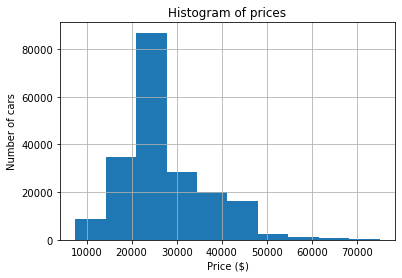

In [19]:
plt.hist(appraisal['price'])
plt.xlabel('Price ($)')
plt.ylabel("Number of cars")
plt.title("Histogram of prices")
plt.grid()

Text(0.5, 1.0, 'Price vs Appraisal Offer')

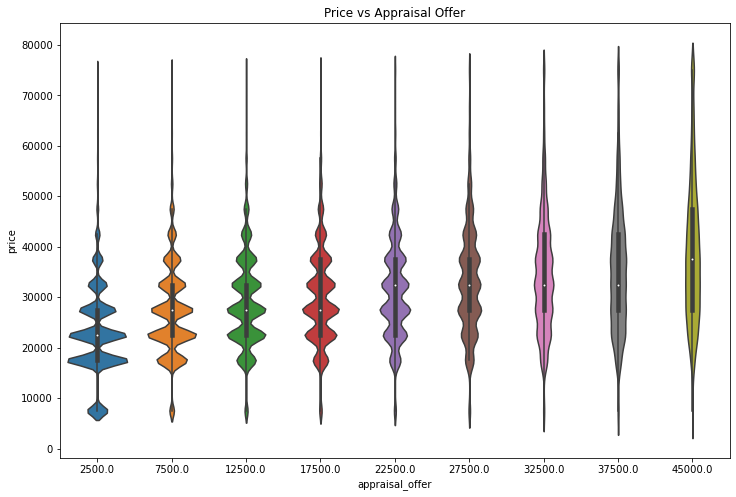

In [33]:
sns.violinplot(data = appraisal, x = 'appraisal_offer', y = 'price', figsize = (20, 10))
plt.title("Price vs Appraisal Offer")